<a href="https://colab.research.google.com/github/IIbitoye/FDSfE_IIbitoye/blob/main/HW7/Ite'sHW7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis of Movie Reviews:
## Data - 
the data comes from the Kaggla challenge https://www.kaggle.com/code/yagli18/sentiment-analysis-on-movie-reviews and is comprosed of ~10k movie reviews and associated ratings. 
The challenge there is to create a model that predicts the rating based on the review, which is a Natural Language Processing sentiment analysis task. Sentiment analysis measures the "sentiment" (typically in a positive-to-negative linear scale) of a text. There are many issues with sentiment analysis in genera, and in particulat here, the "sentiment" of the review (negative, which is associated with sad and angry for example) may not match with the judgement on the quality of the movie (which may be sad, but good if it is a drama) 

**We will simply apply a pre-trained model that weights each word in the text to measure its negative-to-positive sentiment and compounds all the words to get an overall sentiment. The right way to do this tho would be to _train_ a new model on the data, learning the match between the sentiment of the words and the rating assigned by the author of the review. That way, the model is _specific_ to this data. This is a challenge that I live for you!**

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [86]:
import os
import json
import pandas as pd

import numpy as np
import pylab as plt
import seaborn as sns
import statistics as st

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [5]:
env = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = env["username"]
os.environ["KAGGLE_KEY"] = env["key"]

In [6]:
!kaggle datasets sentiment

usage: kaggle datasets [-h]
                       {list,files,download,create,version,init,metadata,status}
                       ...
kaggle datasets: error: argument command: invalid choice: 'sentiment' (choose from 'list', 'files', 'download', 'create', 'version', 'init', 'metadata', 'status')


In [7]:
!mkdir sentimentanalysis

mkdir: cannot create directory ‘sentimentanalysis’: File exists


In [8]:
cd sentimentanalysis/

/content/drive/MyDrive/sentimentanalysis


In [9]:
!kaggle competitions download -c sentiment-analysis-on-movie-reviews

sentiment-analysis-on-movie-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)


In [10]:
!ls *

sampleSubmission.csv			 test.tsv.zip
sentiment-analysis-on-movie-reviews.zip  train.tsv.zip


In [11]:
!unzip  sentiment-analysis-on-movie-reviews.zip


Archive:  sentiment-analysis-on-movie-reviews.zip
replace sampleSubmission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace test.tsv.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace train.tsv.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [12]:
reviews = pd.read_csv("train.tsv.zip", sep="\t")
reviews

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [13]:
reviews=reviews.groupby("SentenceId").first()
reviews
reviews.head()

,PhraseId,Phrase,Sentiment
SentenceId,,,
1,1,A series of escapades demonstrating the adage ...,1
2,64,"This quiet , introspective and entertaining in...",4
3,82,"Even fans of Ismail Merchant 's work , I suspe...",1
4,117,A positively thrilling combination of ethnogra...,3
5,157,Aggressive self-glorification and a manipulati...,1


In [14]:
reviews.shape

(8529, 3)

In [15]:
reviews[["Phrase", "Sentiment"]].values

array([['A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .',
        1],
       ['This quiet , introspective and entertaining independent is worth seeking .',
        4],
       ["Even fans of Ismail Merchant 's work , I suspect , would have a hard time sitting through this one .",
        1],
       ...,
       ["-LRB- Tries -RRB- to parody a genre that 's already a joke in the United States .",
        1],
       ["The movie 's downfall is to substitute plot for personality .",
        1],
       ["The film is darkly atmospheric , with Herrmann quietly suggesting the sadness and obsession beneath Hearst 's forced avuncular chortles .",
        2]], dtype=object)

In [16]:
print('Number of Reviews/Documents: {}'.format(len(reviews)))
sum=np.sum([len(phrase.split()) for phrase in reviews["Phrase"].values])
print('Corpus Size (words): {}'.format(sum))

Number of Reviews/Documents: 8529
Corpus Size (words): 162044


In [17]:
reviews.Sentiment.unique()

array([1, 4, 3, 2, 0])

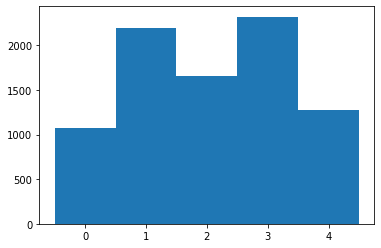

In [18]:
#plot sentiment histogram
plt.hist(reviews["Sentiment"],bins=[-0.5, 0.5, 1.5, 2.5, 3.5,4.5]);

This is a plot of sentiment reviews. It tells us the number of reviews in each sentiment category.

In [19]:
!pip install stop_words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32912 sha256=77c5a6f43ed6cef2fa3bce696dc6e61206b8d8e8349a7162cd9076a1d96aa558
  Stored in directory: /root/.cache/pip/wheels/fb/86/b2/277b10b1ce9f73ce15059bf6975d4547cc4ec3feeb651978e9
Successfully built stop-words


In [20]:
from nltk.tokenize import word_tokenize


In [21]:
!python -m nltk.downloader punkt

/usr/lib/python3.7/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [22]:
#NLP packs
import nltk
from nltk.tokenize import word_tokenize
#from nltk.corpus import stopwords
from stop_words import get_stop_words
#from textblob import TextBlob , Word
#import re 
#import string

In [23]:
#remove some characters like new line from the strings
reviews['Phrase'] = reviews['Phrase'].str.lower(
    ).str.replace(
        '[^\w\s]', '').str.replace(
            '\d+', '').str.replace(
                '\n',' ').replace(
                        '\r','').str.replace(
                            "[^a-zA-Z0-9\s]",'') 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  


# lets talk about the lambda construct and apply

In [24]:
reviews['Phrase'] = reviews['Phrase'].apply(lambda x:word_tokenize(x)) # sentence -> words
reviews['Phrase']

SentenceId
1       [a, series, of, escapades, demonstrating, the,...
2       [this, quiet, introspective, and, entertaining...
3       [even, fans, of, ismail, merchant, s, work, i,...
4       [a, positively, thrilling, combination, of, et...
5       [aggressive, selfglorification, and, a, manipu...
                              ...                        
8540    [either, you, re, willing, to, go, with, this,...
8541    [despite, these, annoyances, the, capable, cla...
8542    [lrb, tries, rrb, to, parody, a, genre, that, ...
8543    [the, movie, s, downfall, is, to, substitute, ...
8544    [the, film, is, darkly, atmospheric, with, her...
Name: Phrase, Length: 8529, dtype: object

# lets talk about stop words... and list comprehensions

In [25]:
from wordcloud import WordCloud, STOPWORDS
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [26]:
reviews["Phrase"] = reviews["Phrase"].apply(lambda x: [word for word in x if word not in STOPWORDS]) # stop words removal


# Frequency of words

In [27]:
nltk.FreqDist(reviews.Phrase.sum()).most_common(10)

[('s', 2558),
 ('film', 1150),
 ('movie', 969),
 ('nt', 680),
 ('one', 553),
 ('rrb', 352),
 ('lrb', 351),
 ('story', 347),
 ('will', 265),
 ('good', 264)]

In [28]:
#reviews["Phrase"] = reviews["Phrase"].apply(lambda x : 
#                  [word for word in x if word not in 
#                   ["s", "nt", "rrb", "lrb", "one"]]) # more "stop" words 
# or I could do it by length: are there gpoing to be key words that are <4 characters??
reviews["Phrase"] = reviews["Phrase"].apply(lambda x : 
                  [word for word in x if len(word)>3]) # more "stop" words 


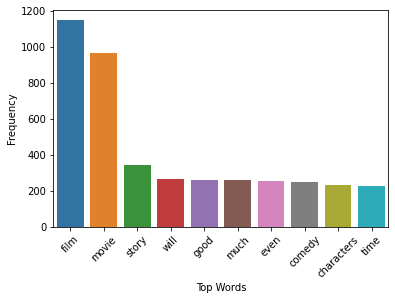

In [29]:
words_freq = pd.DataFrame(nltk.FreqDist(reviews.Phrase.sum(
                                          )).most_common(10), 
                          columns=['Top Words', 'Frequency'])
ax = sns.barplot(x="Top Words",y="Frequency",data=words_freq)
plt.xticks(rotation = 45); # Rotates X-Axis Ticks by 45-degrees


This plot shows us the frequency of the most occuring words in the reviews dataset.

# Lets talk about the str.join() method

In [30]:
def wc(data,bgcolor): # word cloud
    plt.figure(figsize=(10,10))
    wc = WordCloud(background_color=bgcolor, max_words=100, 
                 min_word_length=4, contour_width=3, 
                 contour_color='steelblue')
    wc.generate(" ".join(data)) # tum kelimeleri birlestirip tek 1 string haline getirir
    plt.imshow(wc)
    plt.axis("off")



#TASK 1 : 
Use the function above to plot the word cloud **for Sentiment==0**, comment on the plot to describe how a wordcloud should be read and what are interesting words that appear

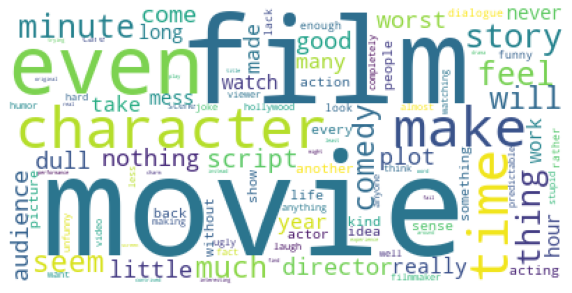

In [31]:
# your code here
#plot the word cloud for sentiment 0
wc(reviews[reviews["Sentiment"]==0]["Phrase"].sum(), bgcolor="white")

 This is an image showing the most common words that show up in reviews with a 0 sentiment score. The bigger the words are the more common they are in the reviews. This cloud is interesting because it is made up of both positive and negativve words. Some interesting words are dull and nothing.

#TASK 2 : 
Use the function above to plot the word cloud **for Sentiment==4**, comment on the plot to describe how a wordcloud should be read and what are interesting words that appear. How does it differ from Sentiment==0?

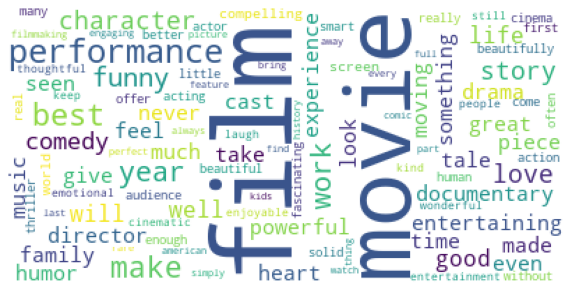

In [32]:
# your code here
#plot the word cloud for sentiment 4
wc(reviews[reviews["Sentiment"]==4]["Phrase"].sum(), bgcolor="white")

This is an image showing the most common words that show up in reviews with a sentiment score of 4. Again, the bigger the words are the more they appear in the reviews. This cloud is different than the 0 sentiment cloud because there are fewer words that are much bigger than the others. Also, the position of the words "film" and "movie" is different than it is in the sentiment 0 cloud. Some interesting words are heart and beautifully.

# Task 3: sentiment analysis

install a package that contains a pretrained model: this model will score every word in a sentence as positive or negative (with a continuous score from -1 to 1) and will then average over those words.

In [33]:
!pip install vaderSentiment


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 11.9 MB/s 


In [34]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#remember to move this cell to the top: all imports should be in the top cell (as well as installs)

In [35]:
#create a model
sid_obj = SentimentIntensityAnalyzer() 
#apply the model to a string
sid_obj.polarity_scores("series escapades demonstrating adage good goose good gander occasionally amuses none amounts much story")
 

{'neg': 0.0, 'neu': 0.573, 'pos': 0.427, 'compound': 0.8024}

In [36]:
#define a function to generate the senriment given a string
def sentiment_vader(words):
  sid_obj = SentimentIntensityAnalyzer()
  sentiment_dict = sid_obj.polarity_scores(' '.join(words))
  return sentiment_dict['compound']


## TASK steps: 
1. take the review for each Sentiment column value (you can use Sentiment==0, Sentiment==1..... like you should have done for the wordclouds) 
2. for each Sentiment group calculate the sentiment of each Phrase, the mean sentiment across the Phrases, and the standard deviation over this mean
3. plot on the x axis the value of the Sentiment column [0, 1, 2, 3, 4]
4. plot on the y axis the _mean_ sentiment as measured by your code for all reviews with that Sentiment value in the dataset
5. include the errorbar on the measured sentiment (use plt.errorbar to do this)
6. Comment on the figure: what do you see? is the model good?

### hint: you may want to use a list comprehension to do this! the steps are not necessarily sequential: everything can be done with a single line of code. This is not required however

**1.**

In [ ]:
s0=reviews[reviews["Sentiment"]==0]["Phrase"]
s0

 **I USED THIS TO GROUP THE REVIEWS FOR EACH SENTIMENT RATING**

In [ ]:
for Phrase in s0:
  print (sentiment_vader(Phrase))

**I USED THIS FOR LOOP TO CALCULATE THE SENTIMENT FOR EACH PHRASE IN EACH SENTIMENT GROUP.**

In [102]:
s0.mean=st.mean((sentiment_vader(Phrase) for Phrase in s0.values))
s0.std=st.stdev((sentiment_vader(Phrase) for Phrase in s0.values))
print ('The mean sentiment across phrases with sentiment 0 is {0:1.3f}'.format(s0.mean))
print ('The mean sentiment across phrases with sentiment 0 is {0:1.3f}'.format(s0.std))

The mean sentiment across phrases with sentiment 0 is -0.101
The mean sentiment across phrases with sentiment 0 is 0.434


**I FOUND THE MEAN SENTIMENT ACROSS THE PHRASES AND THE STANDARD DEVIATIONS OVER THE MEAN**

**I REPEATED THIS STEP FOR EACH SENTIMENT GROUP(..0, 1, 2,3, 4)**

In [ ]:
s1=reviews[reviews["Sentiment"]==1]["Phrase"]
s1

In [ ]:
for Phrase in s1:
  print (sentiment_vader(Phrase))

In [138]:
s1.mean=st.mean((sentiment_vader(Phrase) for Phrase in s1.values))
s1.std=st.stdev((sentiment_vader(Phrase) for Phrase in s1.values))
print ('The mean sentiment across phrases with sentiment 1 is {0:1.3f}'.format(s1.mean))
print ('The standard deviation across the means in sentiment 1 is {0:1.3f}'.format(s1.std))

The mean sentiment across phrases with sentiment 1 is 0.046
The standard deviation across the means in sentiment 1 is 0.418


In [43]:
s2=reviews[reviews["Sentiment"]==2]["Phrase"]
s2

SentenceId
18      [less, dizzily, gorgeous, companion, wong, moo...
20                          [everything, expect, nothing]
24      [chuck, norris, grenade, occurs, times, windta...
25      [plot, romantic, comedy, boilerplate, start, f...
26      [arrives, impeccable, pedigree, mongrel, almos...
                              ...                        
8526    [santa, clause, barely, adequate, babysitter, ...
8531               [even, interest, ganginfested, eastvs]
8540           [either, willing, claustrophobic, concept]
8541    [despite, annoyances, capable, clayburgh, tamb...
8544    [film, darkly, atmospheric, herrmann, quietly,...
Name: Phrase, Length: 1655, dtype: object

In [ ]:
for Phrase in s2:
  print (sentiment_vader(Phrase))

In [137]:
s2.mean=st.mean((sentiment_vader(Phrase) for Phrase in s2.values))
s2.std=st.stdev((sentiment_vader(Phrase) for Phrase in s2.values))
print ('The mean sentiment across phrases with sentiment 2 is {0:1.3f}'.format(s2.mean))
print ('The standard deviation across the means in sentiment 2 is {0:1.3f}'.format(s2.std))

The mean sentiment across phrases with sentiment 2 is 0.118
The standard deviation across the means in sentiment 2 is 0.409


In [ ]:
s3=reviews[reviews["Sentiment"]==3]["Phrase"]
s3

In [ ]:
for Phrase in s3:
  print (sentiment_vader(Phrase))

In [139]:
s3.mean=st.mean((sentiment_vader(Phrase) for Phrase in s3.values))
s3.std=st.stdev((sentiment_vader(Phrase) for Phrase in s3.values))
print ('The mean sentiment across phrases with sentiment 3 is {0:1.3f}'.format(s3.mean))
print ('The standard deviation across the means in sentiment 3 is {0:1.3f}'.format(s3.std))

The mean sentiment across phrases with sentiment 3 is 0.294
The standard deviation across the means in sentiment 3 is 0.413


In [ ]:
s4=reviews[reviews["Sentiment"]==4]["Phrase"]
s4

In [ ]:
for Phrase in s4:
  print (sentiment_vader(Phrase))

In [140]:
s4.mean=st.mean((sentiment_vader(Phrase) for Phrase in s4.values))
s4.std=st.stdev((sentiment_vader(Phrase) for Phrase in s4.values))
print ('The mean sentiment across phrases with sentiment 4 is {0:1.3f}'.format(s4.mean))
print ('The standard deviation across the means in sentiment 4 is {0:1.3f}'.format(s4.std))

The mean sentiment across phrases with sentiment 4 is 0.432
The standard deviation across the means in sentiment 4 is 0.387


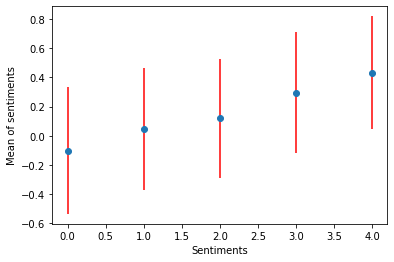

In [142]:
x=[0,1,2,3,4]
y=[s0.mean, s1.mean, s2.mean, s3.mean, s4.mean]
plt.errorbar(x, y, yerr=[s0.std, s1.std, s2.std, s3.std, s4.std],ecolor='Red', fmt='o')
plt.xlabel('Sentiments')
plt.ylabel('Mean of sentiments');

This is a plot of sentiment means against the sentiments.From this plot, I can see that the sentiment means increase as the sentiment scores increase.The red lines represent the +/- error, which i set in the parameter to be the standard deviations of each corresponding mean.